In [39]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import kagglehub
from kagglehub import KaggleDatasetAdapter

import os
import shutil

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Download the dataset and get the path to the cached files
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\demat\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1


In [41]:
dest = os.getcwd()

# Copy all files from cache path into your current folder
for file_name in os.listdir(path):
    full_file_name = os.path.join(path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, dest)


In [42]:
df = pd.read_csv(file_name)

In [43]:
print("First 5 records:", df.head())


First 5 records:       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


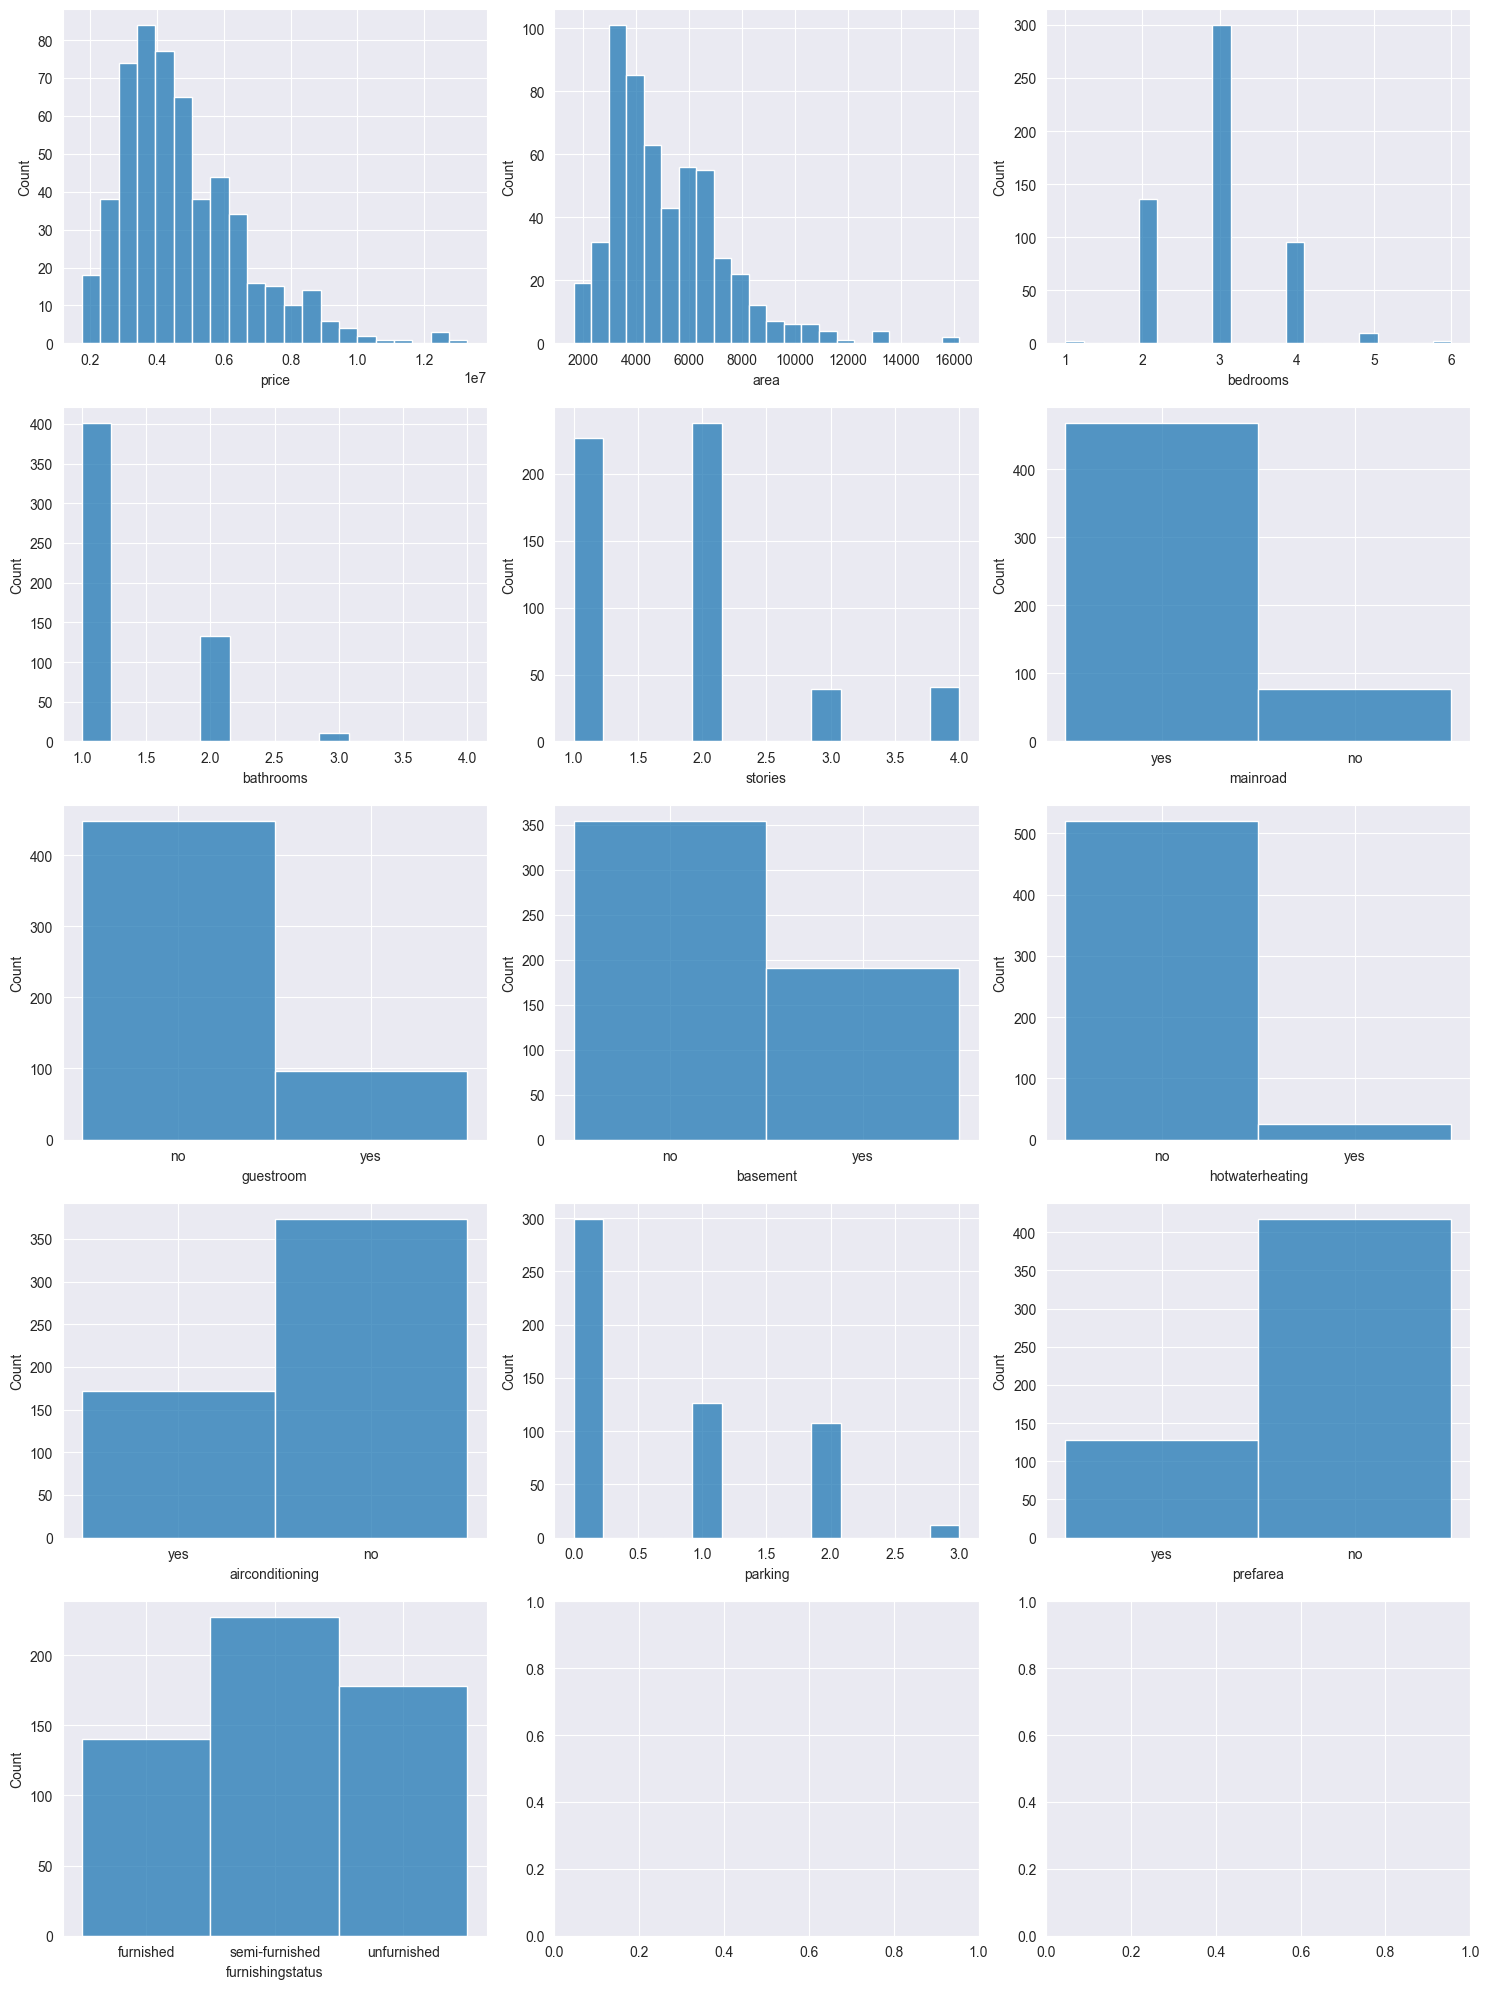

In [44]:
# features_list = ['housing_median_age', 'total_rooms',
#     'total_bedrooms', 'population', 'households', 'median_income',
#     'median_house_value']

fig, ax = plt.subplots(len(df.columns) // 3 + 1, 3, figsize=(15, 20))

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=ax[i//3, i%3])

plt.tight_layout()

plt.show()

# Lab 1 - Normality of data


In [45]:
def norm_and_visualize(column_name):
    modifications = [
        ("Original", df[column_name].dropna()),
        ("Log", np.log1p(df[column_name].dropna())),
        ("Sqrt", np.sqrt(df[column_name].dropna())),
        ("Cbrt", np.cbrt(df[column_name].dropna())),
    ]

    fig, axs = plt.subplots(len(modifications), 2, figsize=(12, 10))

    for i, (label, data) in enumerate(modifications):
        # Histogram
        
        data = (data - np.mean(data)) / np.std(data, ddof=1)

        
        axs[i][0].hist(data, bins=50, edgecolor='black')
        axs[i][0].set_title(f'Histogram of {column_name} ({label})')
        axs[i][0].set_xlabel(column_name)
        axs[i][0].set_ylabel('Frequency')

        mu = np.mean(data)
        sigma = np.std(data)

        x = np.linspace(min(data), max(data), 100)
        y = stats.norm.pdf(x, mu, sigma)

        count, bins = np.histogram(data, bins=50)
        y_scaled = y * len(data) * (bins[1] - bins[0])

        axs[i][0].plot(x, y_scaled, 'r-', lw=4)

        # Q-Q plot
        stats.probplot(data, plot=axs[i][1])
        axs[i][1].set_title(f'Q-Q plot of {column_name} ({label})')

        # KS test
        stat, p = stats.kstest(data, 'norm')
        stat = f"{stat:.4f}"
        p = f"{p:.4f}"
        print(f"{label} p-value:", p, "stat:" , stat)

    plt.tight_layout()
    plt.show()

Original p-value: 0.0000 stat: 0.1050
Log p-value: 0.5577 stat: 0.0336
Sqrt p-value: 0.0098 stat: 0.0695
Cbrt p-value: 0.0537 stat: 0.0573


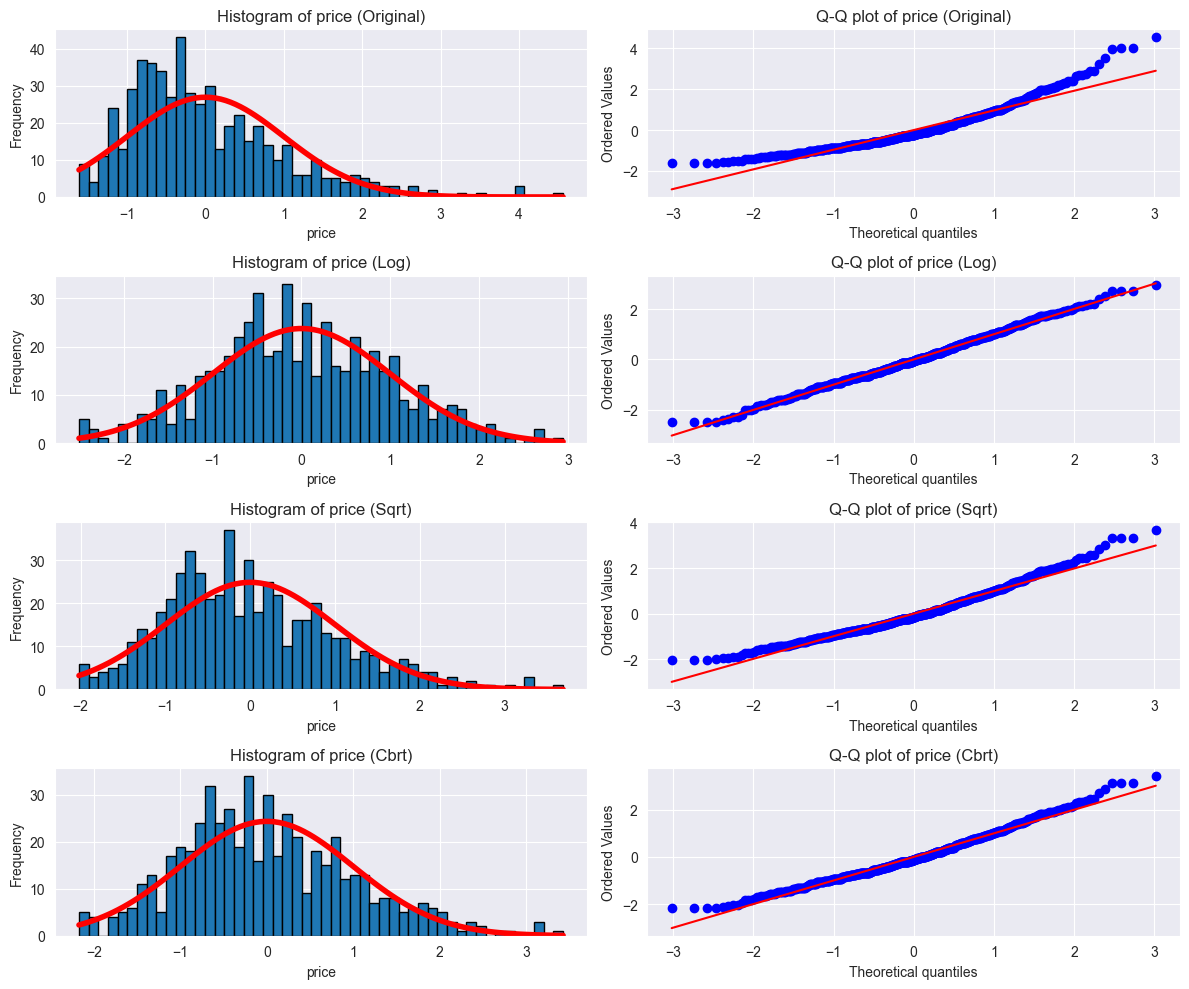

In [46]:
norm_and_visualize('price')

Original p-value: 0.0000 stat: 0.1116
Log p-value: 0.0322 stat: 0.0612
Sqrt p-value: 0.0005 stat: 0.0868
Cbrt p-value: 0.0020 stat: 0.0793


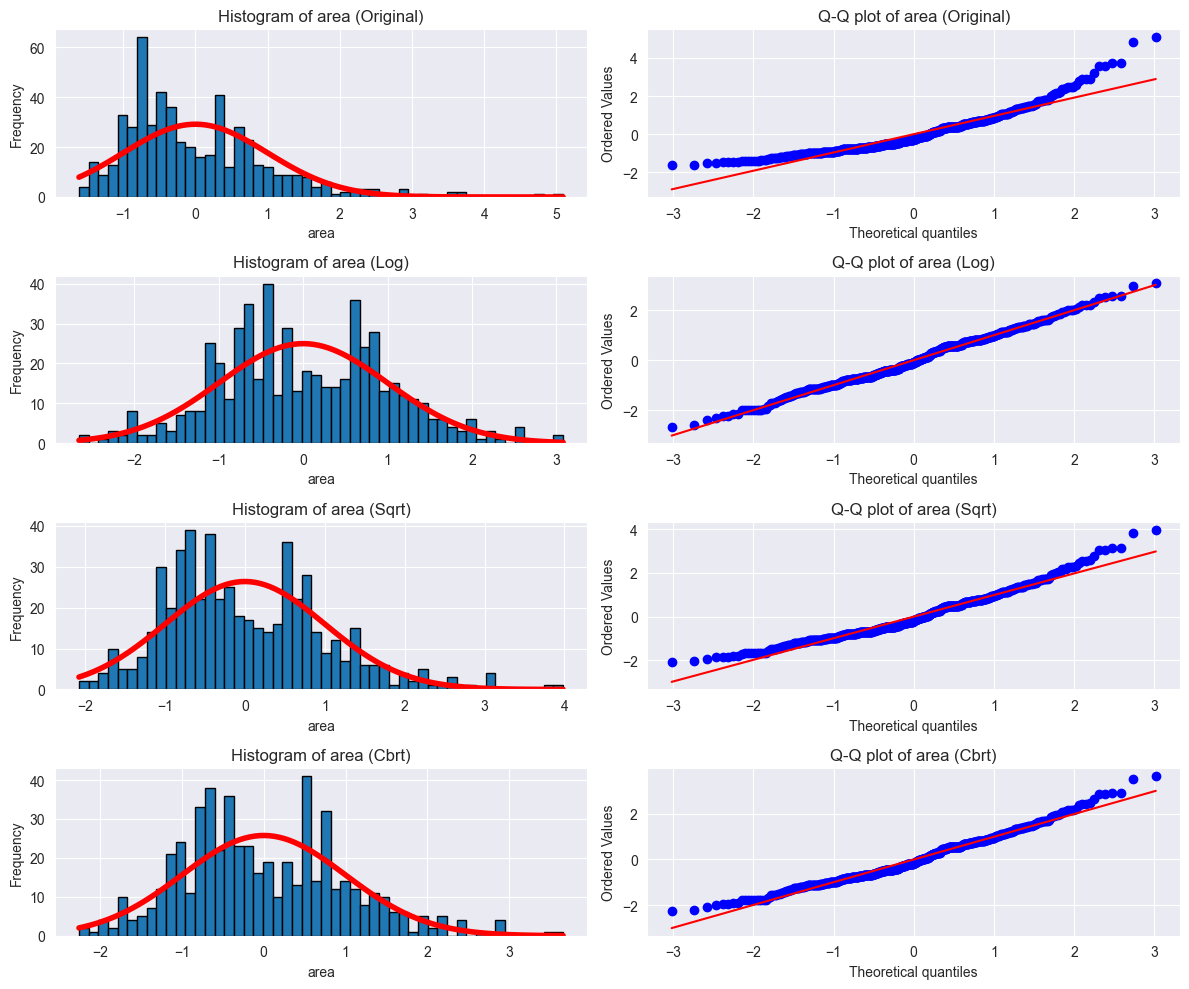

In [47]:
norm_and_visualize('area')

# lab 2 Hypothesis testing


In [93]:
# Hypothesis 2: The average area of houses in the dataset is 5_500 square feet.

sample = df['area'].dropna()
hypothesized_area_mean = 5_500
actual_area_mean = df['area'].mean()
area_std = df['area'].std()
t_st = (actual_area_mean -hypothesized_area_mean) / (area_std / math.sqrt(len(sample)))
p_value = stats.t.sf(np.abs(t_st), df=len(sample)-1)*2  # two-tailed p-value

t_stat, p = stats.ttest_rel(sample, hypothesized_area_mean)

print("Hypothesized mean area:", hypothesized_area_mean)
print("Actual area mean:", actual_area_mean)
print("Calculated - t-statistic:", t_st, "p-value:", f"{p_value:.4f}")
print("imported function - t-statistic:", t_stat, "p-value:", f"{p:.4f}")


Hypothesized mean area: 5500
Actual area mean: 5150.54128440367
Calculated - t-statistic: -3.7592929559392827 p-value: 0.0002
imported function - t-statistic: -3.759292955939285 p-value: 0.0002


In [94]:
sample = df['area'].dropna()
hypothesized_area_mean = 4900
actual_area_mean = df['area'].mean()
area_std = df['area'].std()
t_st = (actual_area_mean -hypothesized_area_mean) / (area_std / math.sqrt(len(sample)))
p_value = stats.t.sf(np.abs(t_st), df=len(sample)-1)*2  # two-tailed p-value

t_stat, p = stats.ttest_rel(sample, hypothesized_area_mean)

print("Hypothesized mean area:", hypothesized_area_mean)
print("Actual area mean:", actual_area_mean)
print("Calculated - t-statistic:", t_st, "p-value:", f"{p_value:.4f}")
print("imported function - t-statistic:", t_stat, "p-value:", f"{p:.4f}")

Hypothesized mean area: 4900
Actual area mean: 5150.54128440367
Calculated - t-statistic: 2.6951912875415736 p-value: 0.0073
imported function - t-statistic: 2.69519128754157 p-value: 0.0073


In [95]:
sample = df['area'].dropna()
hypothesized_area_mean = 5100
actual_area_mean = df['area'].mean()
area_std = df['area'].std()
t_st = (actual_area_mean -hypothesized_area_mean) / (area_std / math.sqrt(len(sample)))
p_value = stats.t.sf(np.abs(t_st), df=len(sample)-1)*2  # two-tailed p-value

t_stat, p = stats.ttest_rel(sample, hypothesized_area_mean)

print("Hypothesized mean area:", hypothesized_area_mean)
print("Actual area mean:", actual_area_mean)
print("Calculated - t-statistic:", t_st, "p-value:", f"{p_value:.4f}")
print("imported function - t-statistic:", t_stat, "p-value:", f"{p:.4f}")

Hypothesized mean area: 5100
Actual area mean: 5150.54128440367
Calculated - t-statistic: 0.5436965397146216 p-value: 0.5869
imported function - t-statistic: 0.5436965397146183 p-value: 0.5869


In [92]:
# Hypothesis 1: The average price of houses in the dataset is $4_700_000.

sample = df['price'].dropna()
hypothesized_price_mean = 4_700_000
actual_price_mean = df['price'].mean()
price_std = df['price'].std()
t_st = (actual_price_mean - hypothesized_price_mean) / (price_std / math.sqrt(len(sample)))
p_value = stats.t.sf(np.abs(t_st), df=len(sample)-1)*2  # two-tailed p-value

t_stat, p = stats.ttest_rel(sample, hypothesized_price_mean)

print("Hypothesized mean price:", hypothesized_price_mean)
print("Actual price mean:", actual_price_mean)
print("Calculated - t-statistic:", t_st, "p-value:", f"{p_value:.4f}")
print("imported function - t-statistic:", t_stat, "p-value:", f"{p:.4f}")

Hypothesized mean price: 4700000
Actual price mean: 4766729.247706422
Calculated - t-statistic: 0.8328576662050415 p-value: 0.4053
imported function - t-statistic: 0.8328576662050461 p-value: 0.4053
